# HEART STROKE PREDICTION 

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [87]:
df=pd.read_csv("heart.csv")
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

Finding the null values 

In [88]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Dropping the null values

In [89]:
df=df.dropna()
df.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

After dropping the values

In [90]:
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [91]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
5           Private          Urban             186.21  29.0  formerly smoked   
...             ...            ...                ...   ...              ...   
5104       children          Rural             103.08  18.6          Unknown   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
2          1  
3          1  
4          1  
5          1  
...      ...  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4909 rows x 12 columns]

Total number of rows and columns

In [92]:
df.shape

(4909, 12)

Rows containing duplicate data

In [93]:
duplicate_rows_df=df[df.duplicated()]
print("number of duplicate rows:",duplicate_rows_df.shape)

number of duplicate rows: (0, 12)


In [94]:
#if duplicates are present then use this
#df=df.drop_duplicates()
#df

Let us visualize the box plot of some attributes to know the outliers

<AxesSubplot:xlabel='age'>

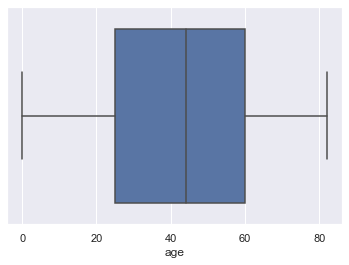

In [95]:
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='avg_glucose_level'>

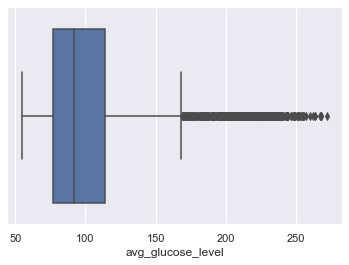

In [96]:
sns.boxplot(x=df['avg_glucose_level'])

Histogram plots

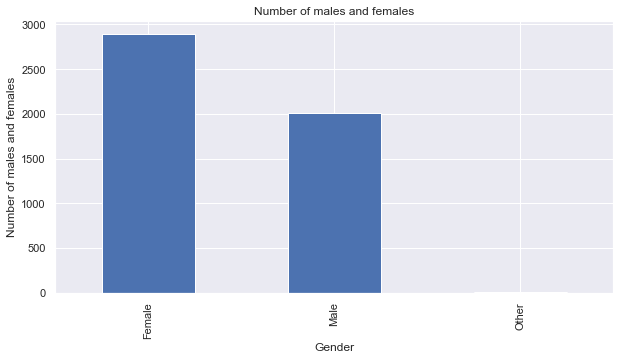

In [97]:
df.gender.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of males and females")
plt.ylabel('Number of males and females')
plt.xlabel('Gender');

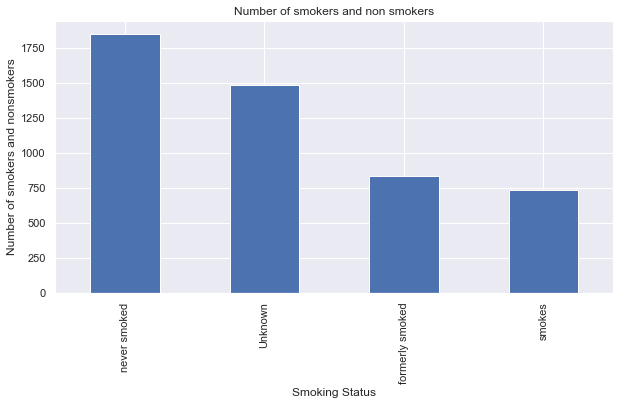

In [98]:
df.smoking_status.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of smokers and non smokers")
plt.ylabel('Number of smokers and nonsmokers')
plt.xlabel('Smoking Status');

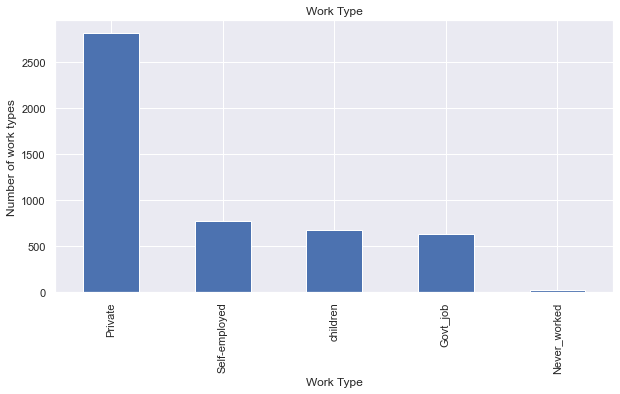

In [99]:
df.work_type.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Work Type")
plt.ylabel('Number of work types')
plt.xlabel('Work Type');

Plotting the scatterplot to show relation between two variables

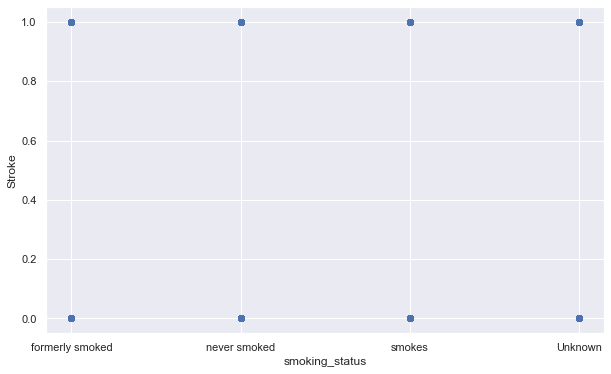

In [100]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['smoking_status'],df['stroke'])
ax.set_xlabel('smoking_status')
ax.set_ylabel('Stroke')
plt.show()

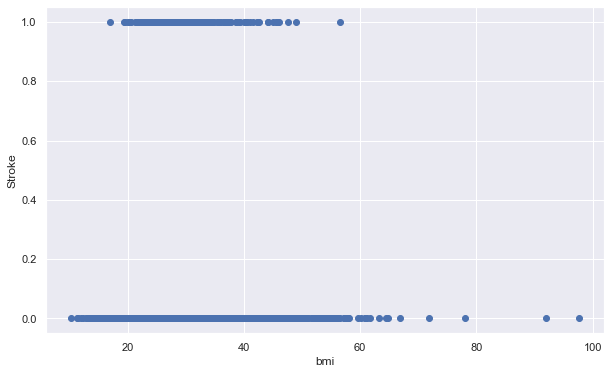

In [101]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['bmi'],df['stroke'])
ax.set_xlabel('bmi')
ax.set_ylabel('Stroke')
plt.show()

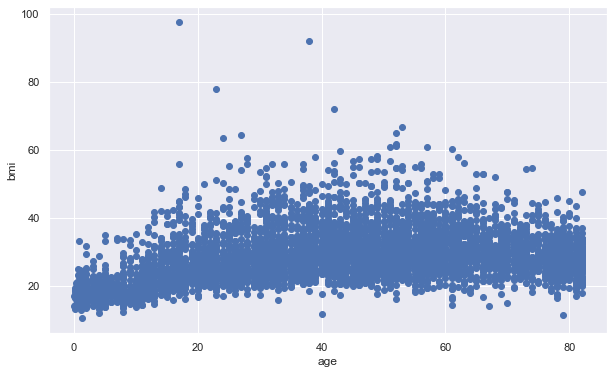

In [102]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['age'],df['bmi'])
ax.set_xlabel('age')
ax.set_ylabel('bmi')
plt.show()

Changing the categorical values into numerical values

In [103]:
df['gen']=pd.factorize(df['gender'])[0]
df['marital']=pd.factorize(df['ever_married'])[0]
df['work']=pd.factorize(df['work_type'])[0]
df['residence']=pd.factorize(df['Residence_type'])[0]
df['smoke']=pd.factorize(df['smoking_status'])[0]

<ipython-input-103-383d534ac4f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gen']=pd.factorize(df['gender'])[0]
<ipython-input-103-383d534ac4f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital']=pd.factorize(df['ever_married'])[0]
<ipython-input-103-383d534ac4f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [104]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
5           Private          Urban             186.21  29.0  formerly smoked   
...             ...            ...                ...   ...              ...   
5104       children          Rural             103.08  18.6          Unknown   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  gen  marital  work  residence  smoke  
0          1    0        0     0          0      0  
2          1    0        0     0          1      1  
3          1    1        0     0          0      2  
4          1    1        0     1          1      1  
5          1    0        0     0          0      0  
...      ...  ...      ...   ...        ...    ...  
5104       0    1        1     3          1      3  
5106       0    1        0     1          0      1  
5107       0    1        0     1          1      1  
5108       0    0        0     0          1      0  
5109       0    1        0     2          0      3  

[4909 rows x 17 columns]

Dropping irrelevant columns

In [105]:
df.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status'], axis=1,inplace=True)  

C:\Users\tanis\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [106]:
df

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  gen  \
0     67.0             0              1             228.69  36.6       1    0   
2     80.0             0              1             105.92  32.5       1    0   
3     49.0             0              0             171.23  34.4       1    1   
4     79.0             1              0             174.12  24.0       1    1   
5     81.0             0              0             186.21  29.0       1    0   
...    ...           ...            ...                ...   ...     ...  ...   
5104  13.0             0              0             103.08  18.6       0    1   
5106  81.0             0              0             125.20  40.0       0    1   
5107  35.0             0              0              82.99  30.6       0    1   
5108  51.0             0              0             166.29  25.6       0    0   
5109  44.0             0              0              85.28  26.2       0    1   

      marital  work  residence  smoke  
0           0     0          0      0  
2           0     0          1      1  
3           0     0          0      2  
4           0     1          1      1  
5           0     0          0      0  
...       ...   ...        ...    ...  
5104        1     3          1      3  
5106        0     1          0      1  
5107        0     1          1      1  
5108        0     0          1      0  
5109        0     2          0      3  

[4909 rows x 11 columns]

To find the relationship between the dependent variables and independent variables, we use heatmaps

age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.274425       0.257123           0.235838   
hypertension       0.274425      1.000000       0.115991           0.180543   
heart_disease      0.257123      0.115991       1.000000           0.154525   
avg_glucose_level  0.235838      0.180543       0.154525           1.000000   
bmi                0.333398      0.167811       0.041357           0.175502   
stroke             0.232331      0.142515       0.137938           0.138936   
gen                0.029817     -0.021978      -0.083014          -0.052613   
marital           -0.680782     -0.162406      -0.111245          -0.151377   
work              -0.415344     -0.073404      -0.054927          -0.063152   
residence         -0.010948      0.001074       0.002362           0.007617   
smoke             -0.386676     -0.132832      -0.071397          -0.108984   

                        bmi    stroke       gen   marital      work  \
age                0.333398  0.232331  0.029817 -0.680782 -0.415344   
hypertension       0.167811  0.142515 -0.021978 -0.162406 -0.073404   
heart_disease      0.041357  0.137938 -0.083014 -0.111245 -0.054927   
avg_glucose_level  0.175502  0.138936 -0.052613 -0.151377 -0.063152   
bmi                1.000000  0.042374  0.025658 -0.341695 -0.347241   
stroke             0.042374  1.000000 -0.007021 -0.105089 -0.057534   
gen                0.025658 -0.007021  1.000000 -0.035543 -0.071263   
marital           -0.341695 -0.105089 -0.035543  1.000000  0.377806   
work              -0.347241 -0.057534 -0.071263  0.377806  1.000000   
residence          0.000122 -0.006031 -0.003755  0.004989 -0.013084   
smoke             -0.235740 -0.075920 -0.040065  0.310702  0.313308   

                   residence     smoke  
age                -0.010948 -0.386676  
hypertension        0.001074 -0.132832  
heart_disease       0.002362 -0.071397  
avg_glucose_level   0.007617 -0.108984  
bmi                 0.000122 -0.235740  
stroke             -0.006031 -0.075920  
gen                -0.003755 -0.040065  
marital             0.004989  0.310702  
work               -0.013084  0.313308  
residence           1.000000 -0.002719  
smoke              -0.002719  1.000000

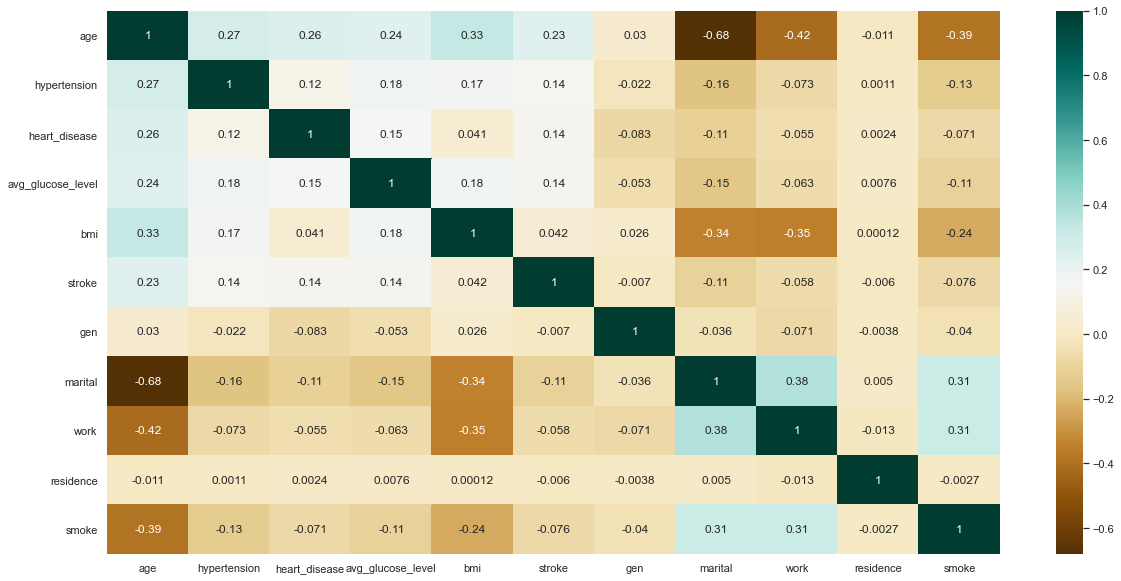

In [107]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

The stroke feature depends on the other variables

Re arrange the columns

In [108]:
columns_titles = ["age", "gen","marital", "work", "residence",
                 "smoke","hypertension","heart_disease","avg_glucose_level","bmi",'stroke']
df=df.reindex(columns=columns_titles)
df

age  gen  marital  work  residence  smoke  hypertension  heart_disease  \
0     67.0    0        0     0          0      0             0              1   
2     80.0    0        0     0          1      1             0              1   
3     49.0    1        0     0          0      2             0              0   
4     79.0    1        0     1          1      1             1              0   
5     81.0    0        0     0          0      0             0              0   
...    ...  ...      ...   ...        ...    ...           ...            ...   
5104  13.0    1        1     3          1      3             0              0   
5106  81.0    1        0     1          0      1             0              0   
5107  35.0    1        0     1          1      1             0              0   
5108  51.0    0        0     0          1      0             0              0   
5109  44.0    1        0     2          0      3             0              0   

      avg_glucose_level   bmi  stroke  
0                228.69  36.6       1  
2                105.92  32.5       1  
3                171.23  34.4       1  
4                174.12  24.0       1  
5                186.21  29.0       1  
...                 ...   ...     ...  
5104             103.08  18.6       0  
5106             125.20  40.0       0  
5107              82.99  30.6       0  
5108             166.29  25.6       0  
5109              85.28  26.2       0  

[4909 rows x 11 columns]

# TESTING AND TRAINING

Splitting the dataset into dependent and independent variables for training and testing

In [109]:
X=df.iloc[:, :-1].values

In [110]:
X

array([[ 67.  ,   0.  ,   0.  , ...,   1.  , 228.69,  36.6 ],
       [ 80.  ,   0.  ,   0.  , ...,   1.  , 105.92,  32.5 ],
       [ 49.  ,   1.  ,   0.  , ...,   0.  , 171.23,  34.4 ],
       ...,
       [ 35.  ,   1.  ,   0.  , ...,   0.  ,  82.99,  30.6 ],
       [ 51.  ,   0.  ,   0.  , ...,   0.  , 166.29,  25.6 ],
       [ 44.  ,   1.  ,   0.  , ...,   0.  ,  85.28,  26.2 ]])

In [111]:
y=df.iloc[:, -1].values

In [112]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=0)

In [114]:
X_train.shape

(3681, 10)

In [115]:
X_test[:3]

array([[ 49.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         70.73,  27.3 ],
       [ 40.  ,   0.  ,   0.  ,   0.  ,   1.  ,   2.  ,   0.  ,   0.  ,
        144.48,  29.8 ],
       [ 74.  ,   1.  ,   0.  ,   2.  ,   0.  ,   1.  ,   0.  ,   0.  ,
        251.99,  25.5 ]])

In [116]:
print(y_train)

[1 0 1 ... 0 0 0]


In [117]:
print(y_test)

[0 0 0 ... 0 0 0]


Feature Scaling

In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [119]:
print(X_train[0:10])

[[ 1.11851407 -1.20378768 -0.74286942 -0.74916439  1.01065167 -0.53421658
  -0.31171847 -0.22674629  2.89959227  1.71949811]
 [ 1.07417662 -1.20378768 -0.74286942 -0.74916439  1.01065167 -0.53421658
   3.20802292  4.41021541  3.36558267  0.27065544]
 [ 1.7392384  -1.20378768 -0.74286942 -0.74916439 -0.98946059  0.38382788
  -0.31171847  4.41021541  0.89418939 -0.31396528]
 [-1.85209523 -1.20378768  1.3461316   1.9186919  -0.98946059  1.30187235
  -0.31171847 -0.22674629 -0.45828638 -1.0892232 ]
 [ 0.01007777  0.82884647 -0.74286942 -0.74916439 -0.98946059  0.38382788
  -0.31171847 -0.22674629 -0.0972508   2.38037371]
 [-0.96534618 -1.20378768  1.3461316  -0.74916439 -0.98946059  1.30187235
  -0.31171847 -0.22674629 -0.70693471 -1.15276893]
 [-0.21160949  0.82884647 -0.74286942 -0.74916439  1.01065167 -0.53421658
  -0.31171847 -0.22674629  0.05815441 -0.47918418]
 [ 0.18742758 -1.20378768 -0.74286942  0.14012104 -0.98946059 -0.53421658
  -0.31171847 -0.22674629 -0.22878216 -0.02165492]


In [120]:
print(X_test[0:5])

[[ 0.27610248 -1.20378768 -0.74286942  0.14012104 -0.98946059 -1.45226105
  -0.31171847 -0.22674629 -0.77630399 -0.19958297]
 [-0.12293459 -1.20378768 -0.74286942 -0.74916439  1.01065167  0.38382788
  -0.31171847 -0.22674629  0.88472995  0.11814569]
 [ 1.38453878  0.82884647 -0.74286942  1.02940647 -0.98946059 -0.53421658
  -0.31171847 -0.22674629  3.30612329 -0.4283476 ]
 [ 0.40911484 -1.20378768 -0.74286942  1.02940647 -0.98946059 -1.45226105
   3.20802292 -0.22674629  2.92481746  1.40176945]
 [ 0.36477738  0.82884647 -0.74286942  1.02940647 -0.98946059  0.38382788
   3.20802292 -0.22674629 -0.79409676  0.5629658 ]]


Random Forest classification

In [121]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [122]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [123]:
print(classifier.predict(sc.transform([[67.0,0,0,0,0,0,0,1,228.69,36.6]])))  #1st row

[1]


In [124]:
print(classifier.predict(sc.transform([[30.0,1,0,0,0,2,0,0,171.23,34.4]])))  #custom

[0]


Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1179    0]
 [  49    0]]


0.9600977198697068

Accuracy : 96.010%


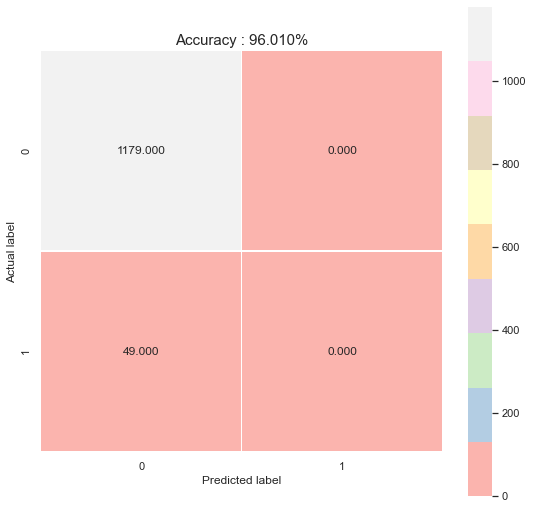

In [126]:
import seaborn as sns
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f", linewidths=.5, square=True, cmap='Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Accuracy : %s' % '{0:.3%}'.format(score)
plt.title(all_sample_title, size=15);
print('Accuracy : %s' % '{0:.3%}'.format(score))

Testing with other models

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome])
      predictions = model.predict(data[predictors])
      print(predictions)
      accuracy = metrics.accuracy_score(predictions,data[outcome])
      print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

Logistic Regression

In [128]:
#logistic Regression
outcome_var=['stroke']
predictor_var = ['age','gen','marital','work','residence','smoke','hypertension','heart_disease','avg_glucose_level','bmi']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

[0 0 0 ... 0 0 0]
Accuracy : 95.743%


C:\Users\tanis\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\tanis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)

[1 1 0 ... 0 0 0]
Accuracy : 86.840%


C:\Users\tanis\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KNN

In [130]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[0 1 0 ... 0 0 0]
Accuracy : 96.313%


C:\Users\tanis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Decision Tree

In [131]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
classification_model(model, df,predictor_var,outcome_var)

[1 1 1 ... 0 0 0]
Accuracy : 100.000%


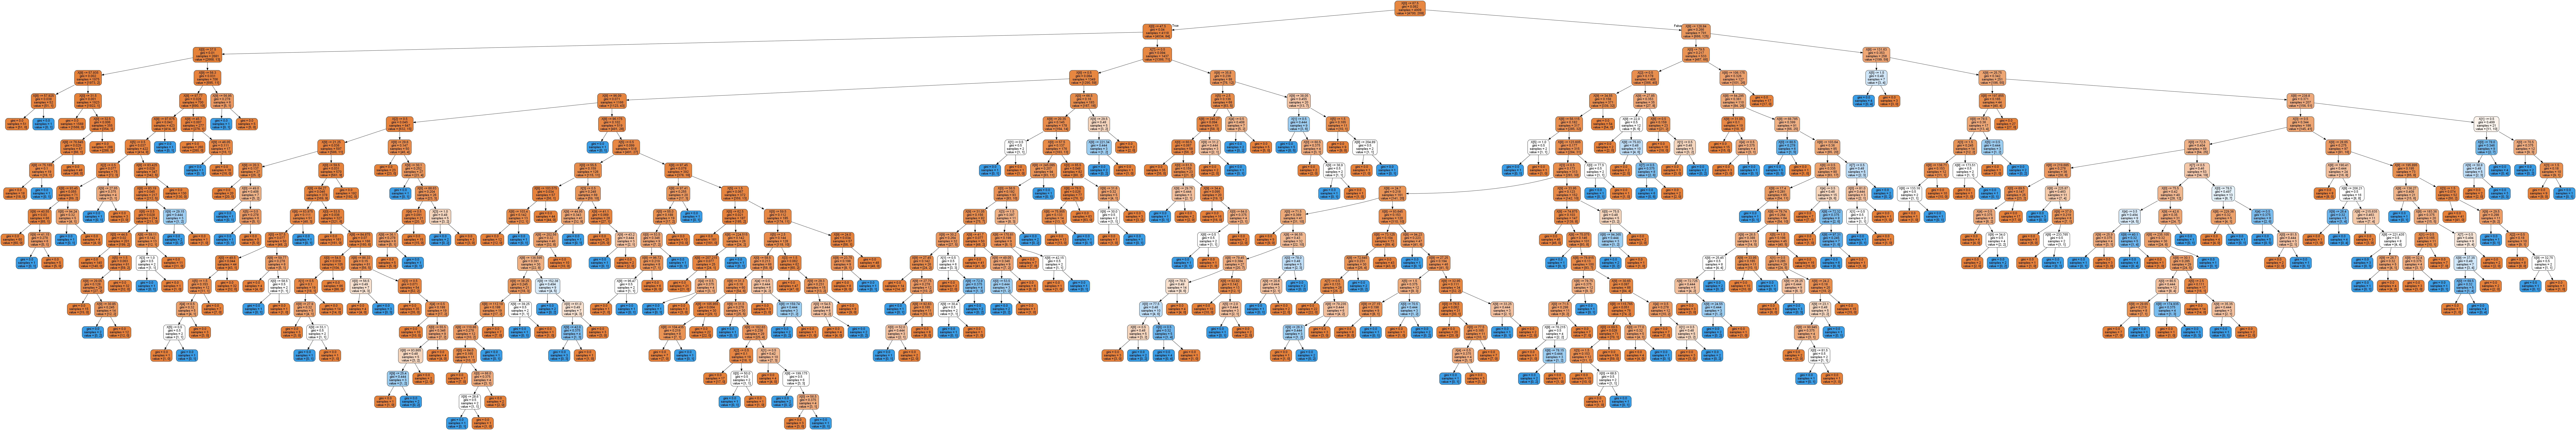

In [132]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot = export_graphviz(model, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

SVM

In [133]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=0)  
classification_model(svm_model, df,predictor_var,outcome_var)

C:\Users\tanis\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]
Accuracy : 95.743%


Series

In [134]:
pred_input=pd.read_csv("heart test.csv")
pred_input

gender  age  hypertension  heart_disease ever_married work_type  \
0    male   32             0              1          yes   private   
1  female   16             0              0           no   private   
2    male   45             1              1           no      self   

  Residence_type  avg_glucose_level  bmi  smoking_status  
0          urban                200   36               2  
1          rural                180   23               1  
2          urban                220   38               0

In [135]:
pred_input['gen']=pd.factorize(pred_input['gender'])[0]
pred_input['marital']=pd.factorize(pred_input['ever_married'])[0]
pred_input['work']=pd.factorize(pred_input['work_type'])[0]
pred_input['residence']=pd.factorize(pred_input['Residence_type'])[0]
pred_input['smoke']=pd.factorize(pred_input['smoking_status'])[0]

In [136]:
pred_input.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis=1,inplace=True)  

In [137]:
pred_input

age  hypertension  heart_disease  avg_glucose_level  bmi  gen  marital  \
0   32             0              1                200   36    0        0   
1   16             0              0                180   23    1        1   
2   45             1              1                220   38    0        1   

   work  residence  smoke  
0     0          0      0  
1     0          1      1  
2     1          0      2

In [138]:
columns_titles = ["age", "gen","marital", "work", "residence",
                 "smoke","hypertension","heart_disease","avg_glucose_level","bmi"]
pred_input=pred_input.reindex(columns=columns_titles)
pred_input

age  gen  marital  work  residence  smoke  hypertension  heart_disease  \
0   32    0        0     0          0      0             0              1   
1   16    1        1     0          1      1             0              0   
2   45    0        1     1          0      2             1              1   

   avg_glucose_level  bmi  
0                200   36  
1                180   23  
2                220   38

In [139]:
pred_output=model.predict(pred_input)

In [140]:
pred_input["stroke"]=pred_output

In [141]:
pred_input

age  gen  marital  work  residence  smoke  hypertension  heart_disease  \
0   32    0        0     0          0      0             0              1   
1   16    1        1     0          1      1             0              0   
2   45    0        1     1          0      2             1              1   

   avg_glucose_level  bmi  stroke  
0                200   36       0  
1                180   23       0  
2                220   38       0